In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

import karo_qa
from karo_qa.utils.methods import functions as utfc
import karo_qa.utils.viewer as viw

In [2]:
CYLINDER = False

folder_path = "/Volumes/KINGSTON/glover7T/qa2/qa_test_2_2023.11.30-16_05_23-STD-1.3.12.2.1107.5.99.3_19900101/Neuro_Vuxen_20231130_160526.300000"

scanner = karo_qa.dicomFolderScanner(folder_path)
scanner.list_scans()
scanner.choose_scan("160241.148000 ep2d_128_3mm_p2_bw3004_AP_fullABox_absolute_accFac4_ref36_dyn")
scanner.sequence_properties()
# scanner.get_data()
# scanner.view_raw_image()


Dicom Directory found and loaded in...

List of different scans in the folder:
154759.038000 ep2d_128_3mm_p2_bw3004_AP_fullABox_absolute_accFac2_ref30_dyn
155518.979000 ep2d_128_3mm_p2_bw3004_AP_fullABox_absolute_accFac3_ref27_dyn
160241.148000 ep2d_128_3mm_p2_bw3004_AP_fullABox_absolute_accFac4_ref36_dyn

Sorted Sequence Directory found. Loading in...
Image Information for 160241.148000 ep2d_128_3mm_p2_bw3004_AP_fullABox_absolute_accFac4_ref36_dyn:
Slices: 32 
Images in timeseries: 200 
Dimensions: x=128, y=128




In [3]:
ana2 = karo_qa.cylinderAnalyzer(scanner)
ana2.sequence_name = "154759.038000 ep2d_128_3mm_p2_bw3004_AP_fullABox_absolute_accFac2_ref30_dyn"
ana2.loadMetrics()
test2 = ana2.all_metrics.copy()

ana3 = karo_qa.cylinderAnalyzer(scanner)
ana3.sequence_name = "155518.979000 ep2d_128_3mm_p2_bw3004_AP_fullABox_absolute_accFac3_ref27_dyn"
ana3.loadMetrics()
test3 = ana3.all_metrics.copy()

ana4 = karo_qa.cylinderAnalyzer(scanner)
ana4.sequence_name = "160241.148000 ep2d_128_3mm_p2_bw3004_AP_fullABox_absolute_accFac4_ref36_dyn"
ana4.loadMetrics()
test4 = ana4.all_metrics.copy()

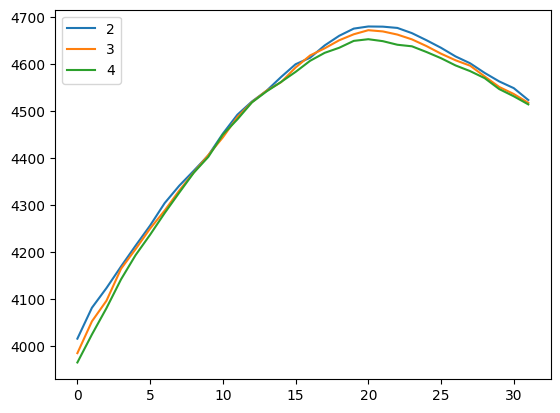

In [4]:
plt.plot(np.mean(test2[2], axis=0), label="2")
plt.plot(np.mean(test3[2], axis=0), label="3")
plt.plot(np.mean(test4[2], axis=0), label="4")
plt.legend()

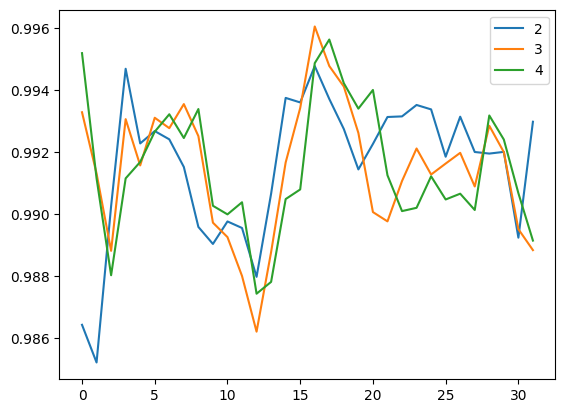

In [5]:
plt.plot(np.mean(test2[3], axis=0), label="2")
plt.plot(np.mean(test3[3], axis=0), label="3")
plt.plot(np.mean(test4[3], axis=0), label="4")
plt.legend()

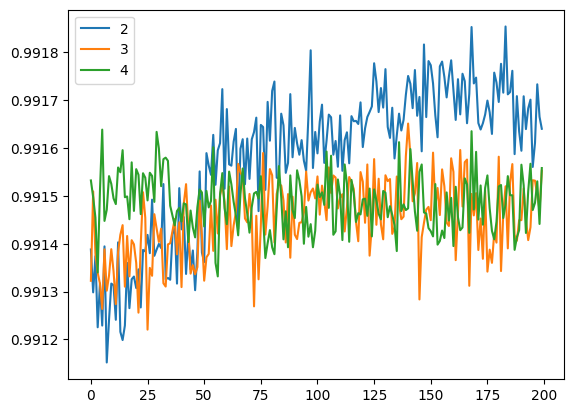

In [6]:
plt.plot(np.mean(test2[3], axis=1), label="2")
plt.plot(np.mean(test3[3], axis=1), label="3")
plt.plot(np.mean(test4[3], axis=1), label="4")
plt.legend()

Generating dataarray...: 100%|██████████| 200/200 [00:11<00:00, 17.38it/s]


Dimensions of Array: (200, 32, 128, 128)
SNR 0.03


Detrending Pixels: 100%|██████████| 16384/16384 [00:02<00:00, 8048.65it/s]


SFNR 50.26
Percent Fluctuation 1.82
Drift 0.31


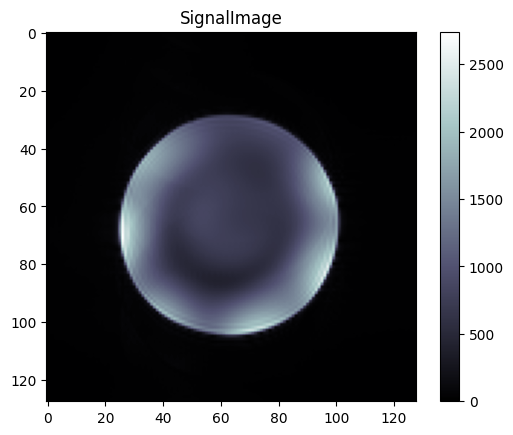

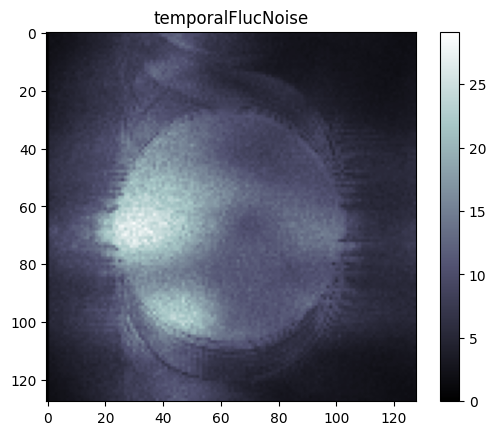

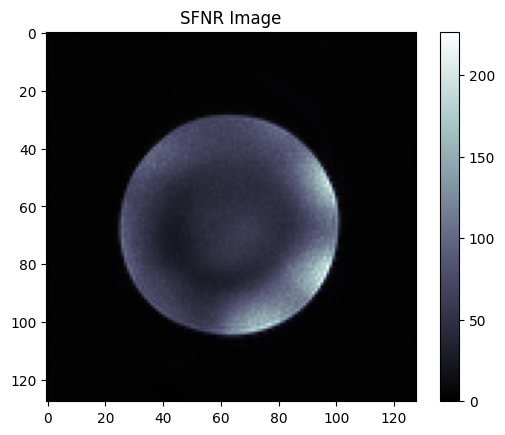

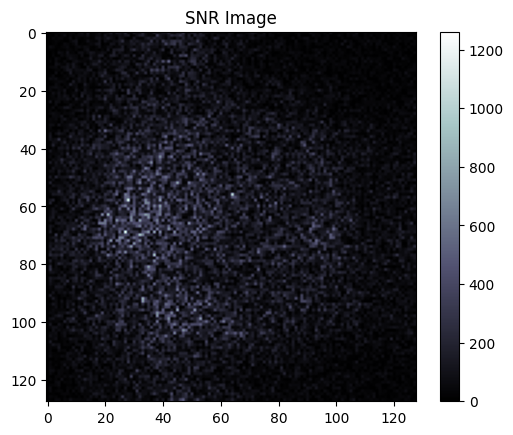

In [7]:
scanner.get_data()
# gm = karo_qa.gloverAnalyzer(np.mean(scanner.imagedata, axis=1))
gm = karo_qa.gloverAnalyzer(scanner.imagedata[:,15])

print(f"SNR {gm.snrSV}")
print(f"SFNR {gm.sfnrSV}")

print(f"Percent Fluctuation {gm.percentFluc}")
print(f"Drift {gm.drift}")
gm.viewer.view_image(gm.signalImage,"SignalImage")
gm.viewer.view_image(gm.tempFlucImage,"temporalFlucNoise")
gm.viewer.view_image(gm.sfnrImage,"SFNR Image")
gm.viewer.view_image(gm.staticSpatialNoiseImage,"SNR Image")
# gm.weisskoffAnalysis(30)

In [8]:
scanner.list_scans()
scanner.choose_scan("154759.038000 ep2d_128_3mm_p2_bw3004_AP_fullABox_absolute_accFac2_ref30_dyn")
scanner.get_data()


List of different scans in the folder:
154759.038000 ep2d_128_3mm_p2_bw3004_AP_fullABox_absolute_accFac2_ref30_dyn
155518.979000 ep2d_128_3mm_p2_bw3004_AP_fullABox_absolute_accFac3_ref27_dyn
160241.148000 ep2d_128_3mm_p2_bw3004_AP_fullABox_absolute_accFac4_ref36_dyn

Sorted Sequence Directory found. Loading in...


Generating dataarray...: 100%|██████████| 200/200 [00:11<00:00, 17.28it/s]

Dimensions of Array: (200, 32, 128, 128)


SNR 0.05


Detrending Pixels: 100%|██████████| 16384/16384 [00:02<00:00, 7928.48it/s]


SFNR 72.06
Percent Fluctuation 1.18
Drift 0.51


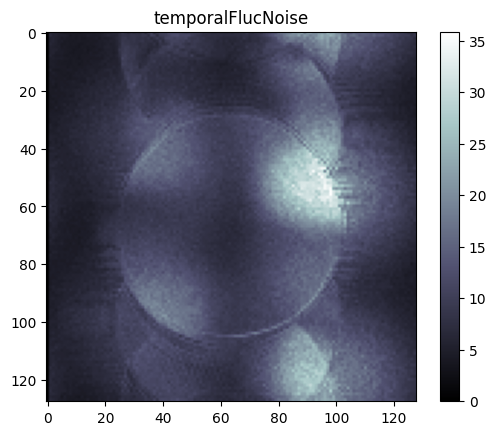

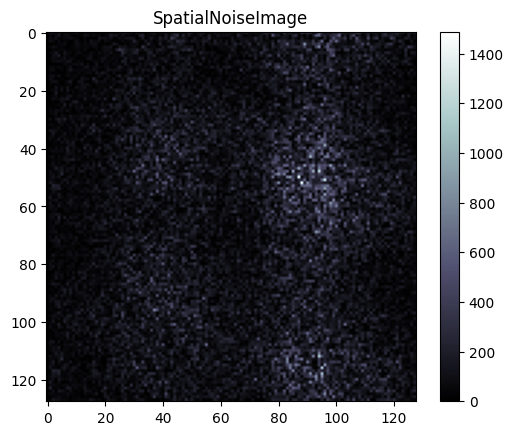

In [9]:
# gm = karo_qa.gloverAnalyzer(np.mean(scanner.imagedata, axis=1))
gm = karo_qa.gloverAnalyzer(scanner.imagedata[:,15])

print(f"SNR {gm.snrSV}")
print(f"SFNR {gm.sfnrSV}")

print(f"Percent Fluctuation {gm.percentFluc}")
print(f"Drift {gm.drift}")
gm.viewer.view_image(gm.tempFlucImage,"temporalFlucNoise")
gm.viewer.view_image(gm.staticSpatialNoiseImage,"SpatialNoiseImage")
# gm.weisskoffAnalysis(30)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


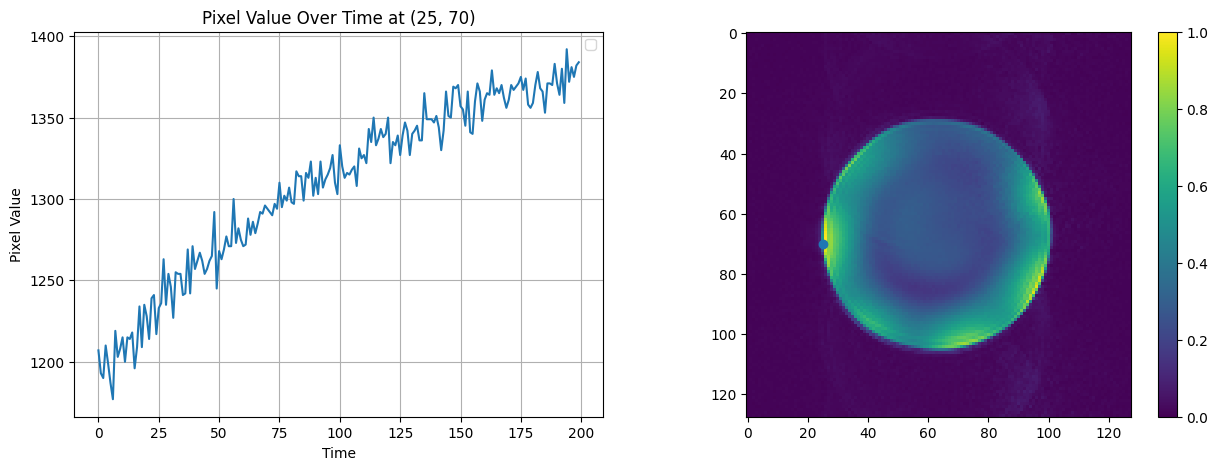

Detrending Pixels: 100%|██████████| 16384/16384 [00:02<00:00, 8008.88it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


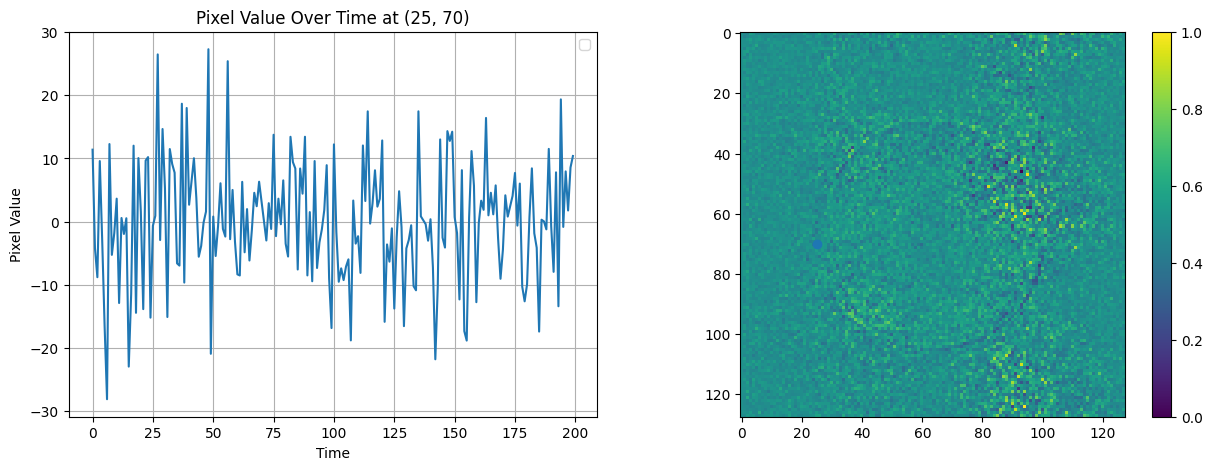

In [13]:
x=25

y=70
gm.viewer.plot_pixel_over_time(gm.timeseries,x,y)
gm.viewer.plot_pixel_over_time(utfc.detrend_image(gm.timeseries),x,y)